В этом блоке мы познакомимся со случайными блужданиями.

Узнаем, что это такое, как их можно построить и в каких случаях они стационарны

In [2]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 71.0 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

рассмотрим такую задачу: Очень нерешительный таракан Афанасий путешествует по числовой прямой. В каждый момент времени он подбрасывает монетку: если выпал орел, идет на один сантиметр вперед, а если решка, то назад.

Такие последовательности называются случайными блужданиями. В них каждое следующее положение получается из предыдущего добавлением какого-нибудь белого шума. В нашем случае - равномерного со значениями -1 и 1. Другими словами, приращения случайных блужданий  - белый шум, то есть абсолютно случайны.
Создадим функцию, которая будет генерировать последовательность координат Афанасия на прямой

Uni означает, что в качестве случайности берется равновероятная (Uniform) модель

rwalk - random walk. 

In [4]:
def unirwalk(num):
    uwalk = np.zeros(num)
    for i in range (1,num):
        # random.randint(-1,1) имитирует подброс монетки. Афанасий сдвигается на один см влево (-1) или вправо (1)
        # относительно прыдыдущего положения uwalk[i-1]
        uwalk[i] = uwalk[i-1] + random.randint(-1,1) 
    return uwalk

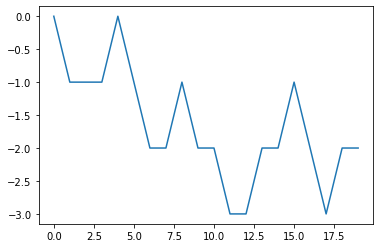

In [5]:
# посмотрим, как будет выглядеть блуждание на 20 шагах
walk = unirwalk(20)
plt.plot(walk)

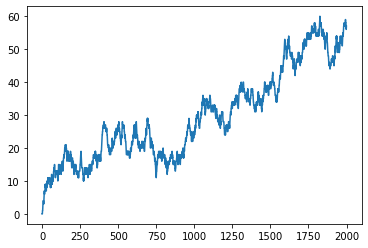

In [6]:
# посмотрим, как будет выглядеть блуждание на 2000 шагах
walk2 = unirwalk(2000)
plt.plot(walk2)

Чем больше временной интервал, тем дальше будет удалаяться Афанасий от точки старта

In [7]:
# среднее значение и стандартное отклонение случайного блуждания:
print('mean и std для num=20:',np.mean(walk), np.std(walk))
print('mean и std для num=2000:',np.mean(walk2), np.std(walk2))

mean и std для num=20: -1.65 0.852936105461599
mean и std для num=2000: 29.535 13.870860643810103


Давайте создадим нормальное случайное блуждание

In [8]:
# num - число шагов
# a - множитель. В каждый момент времени следующее значение равно a*текущее + белый шум
# mu, sigma - параметры шума
def normrwalk(num,a, mu, sigma):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = a*walk[i-1] + eps[i]
    return walk
    

Давайте посмотрим, как ведет себя нормальное случайное блуждание для значения a=0.1, 0.5, 0.9, и 1

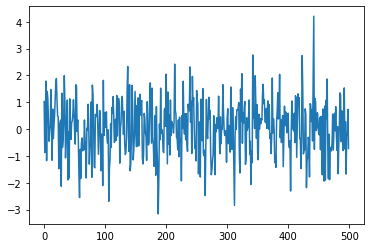

In [9]:
a = 0.1
n_walk_01 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_01)

In [10]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера

test = sm.tsa.adfuller(n_walk_01)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.0
 ряд стационарен


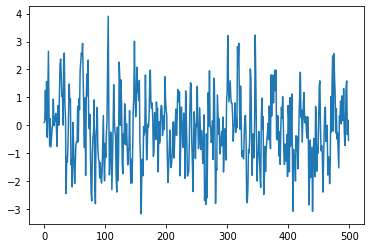

In [11]:
a = 0.5
n_walk_05 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_05)

In [12]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_05)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  2.525827616007772e-23
 ряд стационарен


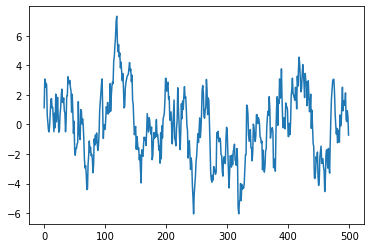

In [13]:
a = 0.9
n_walk_09 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_09)

In [14]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_09)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  2.263281465078425e-05
 ряд стационарен


При а=1 ряд резко меняет поведение и перестает быть стационарным! Это так называемый случай единичного корня, на идее которого и работает тест Дикки-Фуллера

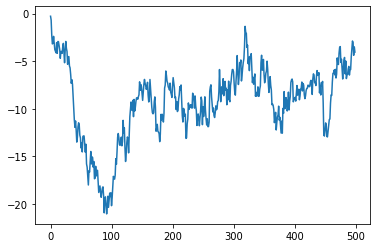

In [15]:
a = 1
n_walk_1 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_1)

In [16]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_1)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.15616944863246857
ряд не стационарен


## Практика. Нестационарность

In [17]:
# num - число шагов
# a - множитель. В каждый момент времени следующее значение равно a*текущее + белый шум
# mu, sigma - параметры шума
def normrwalk2(num, a1, a2, mu, sigma):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    walk[1] = eps[1]
    for i in range (2, num):
        walk[i] = a1*walk[i-1] + a2*walk[i-2] + eps[i]
    return walk

### Задание 9.1

Сгенерируйте $100$ значений временного ряда по правилу $ X_t=0.2X_{t-1}+0.1X_{t-2}+ \varepsilon_t $.

В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией.

Постройте его график.

Проверьте его на стационарность по критерию Дикки-Фуллера:

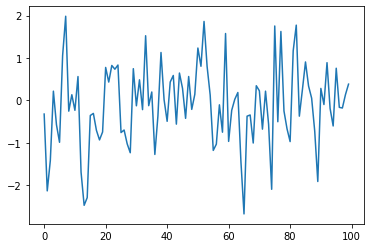

In [22]:
x = normrwalk2(100, 0.2, 0.1, 0, 1)
plt.plot(x)

In [23]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(x)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  3.1353317281678815e-12
 ряд стационарен


Сгенерируйте $100$ значений временного ряда по правилу $ X_t=0.9X_{t-1}+0.07X_{t-2}+ \varepsilon_t $.

В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией.

Постройте его график.

Проверьте его на стационарность по критерию Дикки-Фуллера:

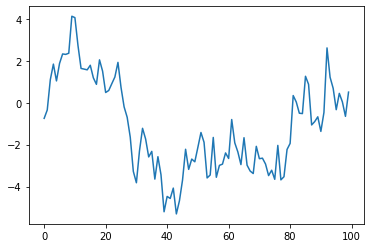

In [24]:
x = normrwalk2(100, 0.9, 0.07, 0, 1)
plt.plot(x)

In [25]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(x)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.1941451104459725
ряд не стационарен
